# Introduction √† l‚Äôapprentissage supervis√©  
  

# Projet 1 : les pingouins

### Pr√©liminaire: Import et visualisation du jeu de donn√©es

In [131]:
# Import Pandas
import pandas as pd

# Import de la base de donn√©es
pengouin_df = pd.read_csv("C:\\Users\\mfonz\\Downloads\\DATA\ML Superv\\Donn√©es\\penguins_size.csv", sep=',', header=0, low_memory=False)

# Aper√ßu
pengouin_df.head(5)

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [132]:
# on va eliminer les valeurs manquantes
pengouin_df = pengouin_df.dropna()
# Aper√ßu
pengouin_df.head(5)

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

### Q1. Entra√Æner un arbre de profondeur 1. Utiliser DecisionTreeClassifier depuis sklearn.tree.

In [133]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Pr√©parer les features et les √©tiquettes
X = pengouin_df[["culmen_length_mm", "culmen_depth_mm"]]
y = pengouin_df["species"]

# Diviser les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

# Instancier un arbre de d√©cision avec profondeur = 1
dt = DecisionTreeClassifier(max_depth=1, random_state=1)
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=1, random_state=1)

### Q2. Produire un scatterplot centr√© sur le culmen, avec pour l‚Äôaxe X sa longueur, et pour l‚Äôaxe Y sa profondeur. 

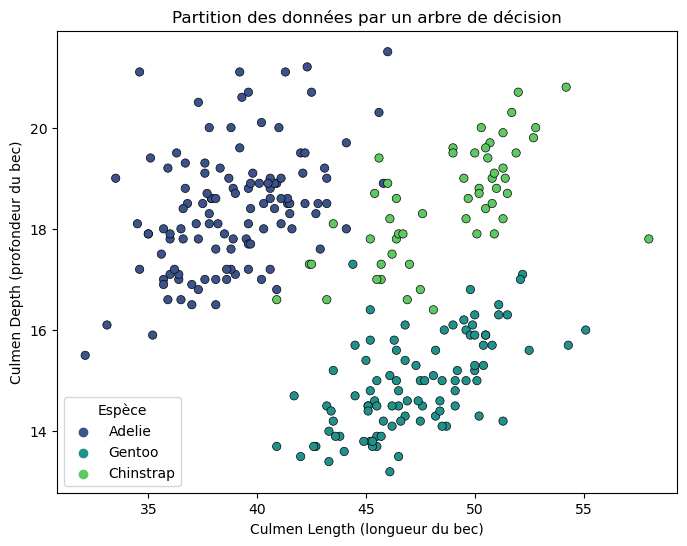

In [134]:
# import des biblioth√®ques
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser les partitions directement avec seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train["culmen_length_mm"], y=X_train["culmen_depth_mm"], hue=y_train, palette="viridis", edgecolor="k")
plt.title("Partition des donn√©es par un arbre de d√©cision")
plt.xlabel("Culmen Length (longueur du bec)")
plt.ylabel("Culmen Depth (profondeur du bec)")
plt.legend(title="Esp√®ce")
plt.show()


Le scatterplot montre la r√©partition des esp√®ces de pengouins en fonction de la longueur et de la profondeur du bec. L'arbre de d√©cision √† profondeur 1 divise grossi√®rement les donn√©es, ce qui entra√Æne visiblement des chevauchements entre les esp√®ces.

### Q3. Fare appara√Ætre le scatterplot dans la partition faite par l‚Äôarbre. Quelle variable l‚Äôarbre de classification a-t-il utilis√©e pour partitionner le jeu de donn√©es ?

<Figure size 800x600 with 0 Axes>

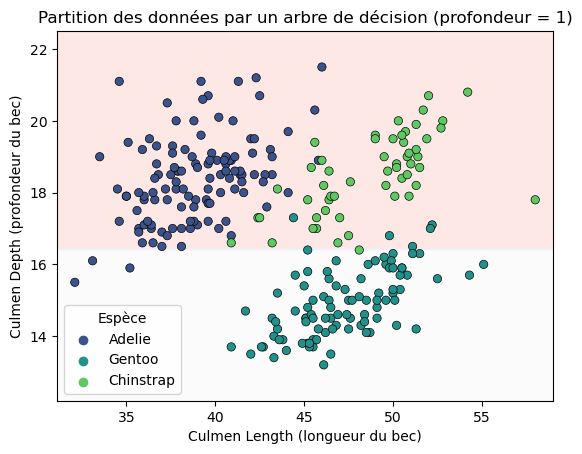

L'arbre de d√©cision a utilis√© la variable 'culmen_depth_mm' avec un seuil de 16.45 pour partitionner les donn√©es.


In [135]:
# Importation des biblioth√®ques compl√©mentaires

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Le mod√®le d√©j√† instanci√© et entra√Æn√©

# Identifier la variable et le seuil choisis par l'arbre
feature_index = dt.tree_.feature[0]  # Index de la feature utilis√©e pour la d√©cision
threshold = dt.tree_.threshold[0]    # Seuil utilis√© pour la division
feature_name = X.columns[feature_index]  

# Visualiser la partition avec DecisionBoundaryDisplay
plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X_train, response_method="predict", alpha=0.3, cmap="Pastel1"
)

# Ajouter les points avec seaborn
sns.scatterplot(x=X_train["culmen_length_mm"], y=X_train["culmen_depth_mm"], hue=y_train, palette="viridis", edgecolor="k")

# Ajouter des √©tiquettes et un titre
plt.title("Partition des donn√©es par un arbre de d√©cision (profondeur = 1)")
plt.xlabel("Culmen Length (longueur du bec)")
plt.ylabel("Culmen Depth (profondeur du bec)")
plt.legend(title="Esp√®ce")
plt.show()

print(f"L'arbre de d√©cision a utilis√© la variable '{feature_name}' avec un seuil de {threshold:.2f} pour partitionner les donn√©es.")


### 4. Faire l‚Äôarbre de classification correspondant. Que constatez-vous quant au choix du label retenu pour chacune des feuilles de l‚Äôarbre ? Est-il coh√©rent avec les valeurs num√©riques affich√©es ? D√®s lors, comment pensez-vous que se comporterait ce mod√®le s‚Äôil √©tait utilis√© selon une logique de pr√©diction ? Quel type de pingouin serait ignor√© ?

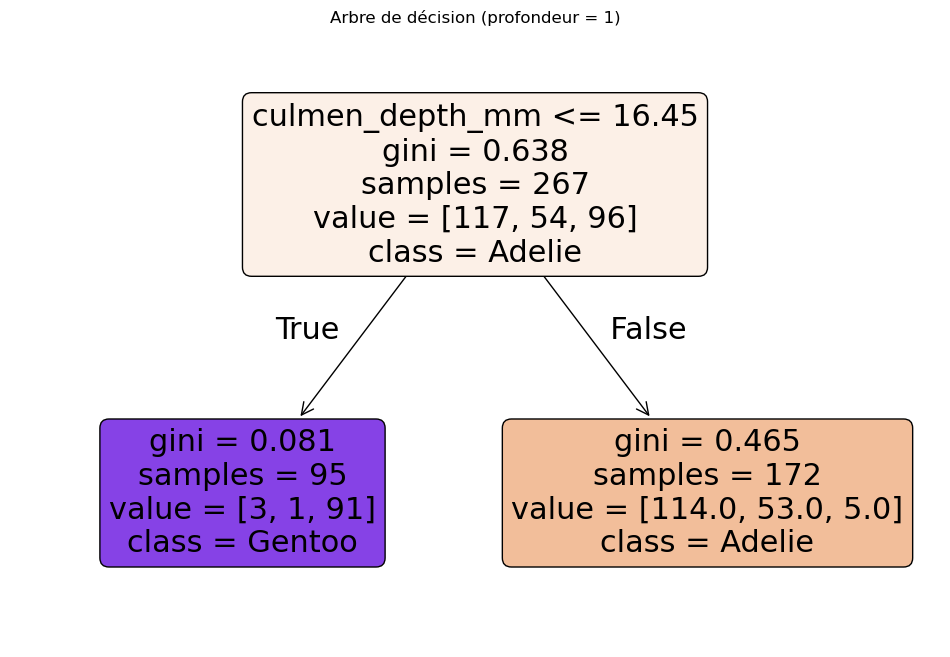

In [136]:
# Importation des biblioth√®ques n√©cessaires
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# arbre d√©j√† entrain√©

# Visualiser l'arbre de d√©cision
plt.figure(figsize=(12, 8))
plot_tree(dt,
          feature_names=["culmen_length_mm", "culmen_depth_mm"],
          class_names=dt.classes_,
          filled=True,
          rounded=True)
plt.title("Arbre de d√©cision (profondeur = 1)")
plt.show()

L'arbre de d√©cision (avec une profondeur de 1) utilise la caract√©ristique culmen_depth_mm pour diviser les donn√©es en deux branches. 
##### 1. Que constatez-vous quant au choix du label retenu pour chacune des feuilles de l‚Äôarbre ?

Chaque feuille est √©tiquet√©e par la classe majoritaire des donn√©es qui s‚Äôy trouvent :
Branche gauche : Classe Gentoo, qui domine avec 91 √©chantillons sur 95.
Branche droite : Classe Ad√©lie, qui domine avec 114 √©chantillons sur 172.
Ce choix est coh√©rent avec le principe des arbres de d√©cision, o√π chaque feuille est pr√©dite par la classe majoritaire.

#### 2. Est-il coh√©rent avec les valeurs num√©riques affich√©es ?
Oui, les pr√©dictions des feuilles sont coh√©rentes avec les proportions des classes :

Branche gauche : Gini faible (0.081) indique une forte homog√©n√©it√© des donn√©es (quasi exclusivement des Gentoo).
Branche droite : Gini plus √©lev√© (0.465) refl√®te une plus grande diversit√© des classes, bien que la classe Ad√©lie reste majoritaire.

#### 3. Comment pensez-vous que se comporterait ce mod√®le s‚Äôil √©tait utilis√© selon une logique de pr√©diction ?

Forces du mod√®le :
La branche gauche est tr√®s fiable pour pr√©dire les Gentoo (pr√©cision √©lev√©e pour cette classe).
Le mod√®le est simple et rapide √† utiliser pour faire des pr√©dictions bas√©es sur culmen_depth_mm.
Limites du mod√®le :
La branche droite pr√©sente une confusion importante entre Ad√©lie et Chinstrap (53 √©chantillons Chinstrap contre 114 Ad√©lie). Cela entra√Ænerait des erreurs pour ces esp√®ces.
Les pr√©dictions pour les Chinstrap seraient souvent incorrectes (confusion avec Ad√©lie).

#### 4. Quel type de pingouin serait ignor√© ?
Les Chinstrap risquent d‚Äô√™tre souvent ignor√©s ou mal classifi√©s, surtout dans la branche droite, o√π leur proportion est importante (53 sur 172) mais minoritaire par rapport aux Ad√©lie. Cela refl√®te une incapacit√© du mod√®le √† bien diff√©rencier ces deux esp√®ces.

En conclusion
L‚Äôarbre de profondeur de 1 est trop simple pour capturer des distinctions fines entre Ad√©lie et Chinstrap. Augmenter la profondeur de l‚Äôarbre pourrait permettre des s√©parations plus complexes.


### 5. Prendre un √©chantillon o√π la longueur est de 35 mm, et la profondeur de 17 mm. R√©aliser une pr√©diction quant √† la classe de pingouin √† laquelle le bec appartient. Comment interpr√©tez vous vos r√©sultats ? Etablissez un lien entre les probabilit√©s obtenues et certaines des valeurs chiffr√©es pr√©sentes dans les feuilles de l‚Äôarbre.

C:\Users\mfonz\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


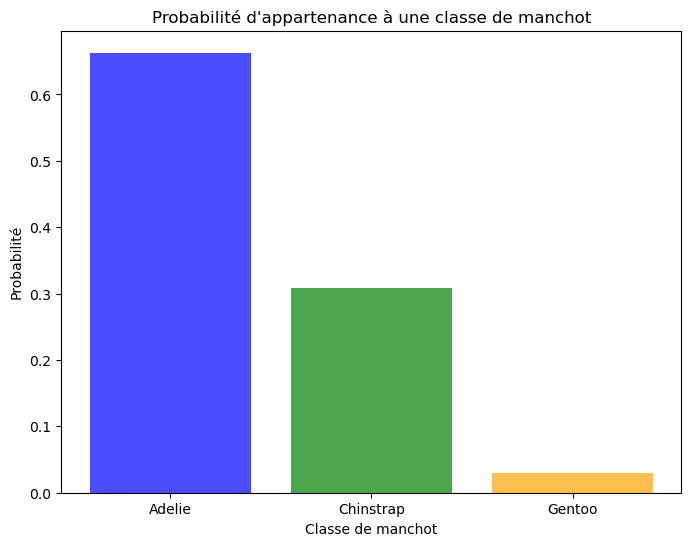

Probabilit√© pour Adelie: 0.66
Probabilit√© pour Chinstrap: 0.31
Probabilit√© pour Gentoo: 0.03


In [137]:
# Observation sp√©cifique √† pr√©dire : longueur = 35 mm, profondeur = 17 mm
observation = [[35, 17]]

# Utiliser le mod√®le entra√Æn√© pour pr√©dire les probabilit√©s
proba = dt.predict_proba(observation)

# Afficher les r√©sultats sous forme de graphique
plt.figure(figsize=(8, 6))
plt.bar(dt.classes_, proba[0], color=['blue', 'green', 'orange'], alpha=0.7)
plt.title("Probabilit√© d'appartenance √† une classe de manchot")
plt.ylabel("Probabilit√©")
plt.xlabel("Classe de manchot")
plt.show()

# Afficher les probabilit√©s dans la console
for species, p in zip(dt.classes_, proba[0]):
    print(f"Probabilit√© pour {species}: {p:.2f}")


##### Les probabilit√©s pour l'√©chantillon de bec de 35 mm de longueur et 17 mm de profondeur sont :

Adelie : 66%
Chinstrap : 31%
Gentoo : 3%
Cela signifie que le mod√®le pr√©dit principalement que l'√©chantillon appartient √† la classe Adelie avec une forte probabilit√© (66%). Les autres classes (Chinstrap et Gentoo) ont des probabilit√©s bien plus faibles.

#### Lien avec les valeurs de l'arbre :

Les probabilit√©s correspondent √† la distribution des classes dans la feuille de l'arbre o√π cet √©chantillon se trouve. La probabilit√© √©lev√©e pour Adelie indique qu'une majorit√© des √©chantillons dans cette r√©gion de l'arbre sont de type Adelie. La faible probabilit√© pour Gentoo (3%) sugg√®re que cette classe est moins repr√©sent√©e dans cette feuille. Cela refl√®te la mani√®re dont les crit√®res de longueur et profondeur du bec ont s√©par√© les classes dans l'arbre de d√©cision.








### Q6. R√©p√©ter l‚Äôensemble des √©tapes pr√©sent√©es ici, mais avec une profondeur d‚Äôarbre maximale de 2. Produire les graphiques correspondants.

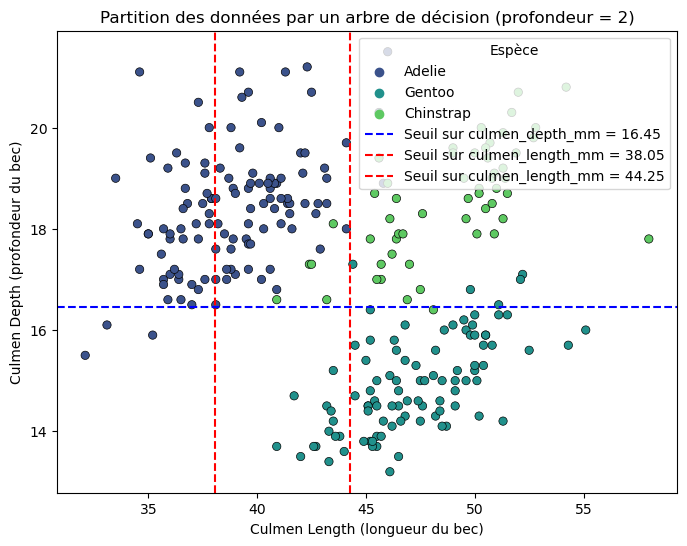

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Pr√©parer les features et les √©tiquettes
X = pengouin_df[["culmen_length_mm", "culmen_depth_mm"]]
y = pengouin_df["species"]

# Diviser les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instancier un arbre de d√©cision avec profondeur = 2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train, y_train)

# Tracer le scatterplot des donn√©es
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train["culmen_length_mm"], y=X_train["culmen_depth_mm"], hue=y_train, palette="viridis", edgecolor="k")

# Ajouter les lignes de d√©cision
for i in range(dt.tree_.node_count):
    feature_index = dt.tree_.feature[i]  # Index de la feature utilis√©e pour la d√©cision
    if feature_index == -2:  
        continue
    
    threshold = dt.tree_.threshold[i]  # Seuil utilis√© pour la division
    feature_name = X.columns[feature_index]  # Nom de la variable

    if feature_name == "culmen_length_mm":
        plt.axvline(x=threshold, color="red", linestyle="--", label=f"Seuil sur {feature_name} = {threshold:.2f}")
    elif feature_name == "culmen_depth_mm":
        plt.axhline(y=threshold, color="blue", linestyle="--", label=f"Seuil sur {feature_name} = {threshold:.2f}")

# Ajouter des √©tiquettes et la l√©gende
plt.title("Partition des donn√©es par un arbre de d√©cision (profondeur = 2)")
plt.xlabel("Culmen Length (longueur du bec)")
plt.ylabel("Culmen Depth (profondeur du bec)")
plt.legend(title="Esp√®ce")
plt.show()


<Figure size 800x600 with 0 Axes>

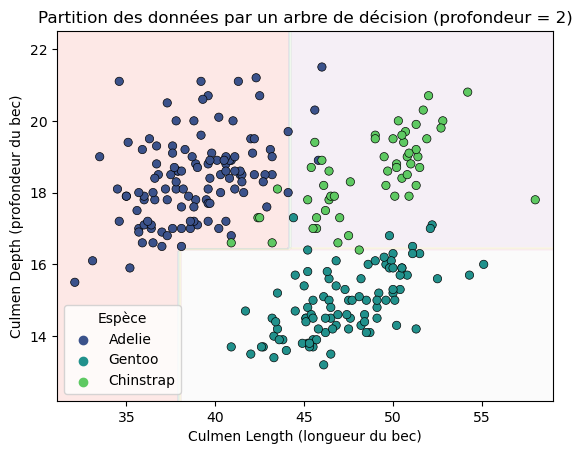

In [139]:
# Import des biblioth√®ques n√©cessaires
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Pr√©parer les features et les √©tiquettes
X = pengouin_df[["culmen_length_mm", "culmen_depth_mm"]]
y = pengouin_df["species"]

# Diviser les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instancier un arbre de d√©cision avec profondeur = 2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train, y_train)

# Visualiser la partition avec DecisionBoundaryDisplay
plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X_train, response_method="predict", alpha=0.3, cmap="Pastel1"
)

# Ajouter les points avec seaborn
sns.scatterplot(
    x=X_train["culmen_length_mm"],
    y=X_train["culmen_depth_mm"],
    hue=y_train,
    palette="viridis",
    edgecolor="k"
)

# Ajouter des √©tiquettes et un titre
plt.title("Partition des donn√©es par un arbre de d√©cision (profondeur = 2)")
plt.xlabel("Culmen Length (longueur du bec)")
plt.ylabel("Culmen Depth (profondeur du bec)")
plt.legend(title="Esp√®ce")
plt.show()



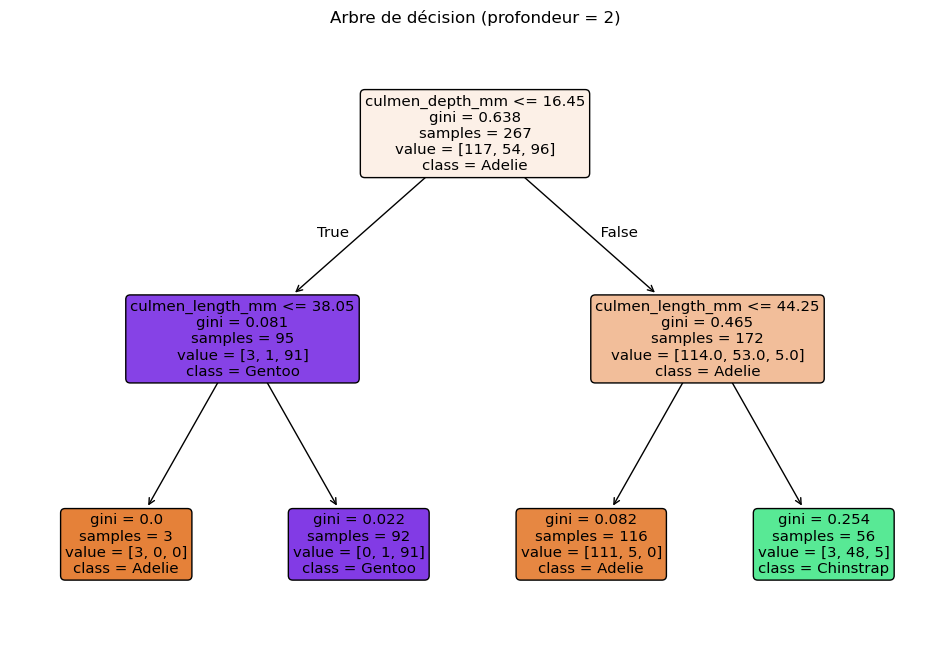

In [32]:
# Importation des biblioth√®ques n√©cessaires
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Pr√©parer les features (longueur et profondeur du bec) et les √©tiquettes (esp√®ces)
X = pengouin_df[["culmen_length_mm", "culmen_depth_mm"]]
y = pengouin_df["species"]

# Diviser les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

# Instancier un arbre de d√©cision avec profondeur = 2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Entra√Æner l'arbre de d√©cision
dt.fit(X_train, y_train)

# Visualiser l'arbre de d√©cision
plt.figure(figsize=(12, 8))
plot_tree(dt,
          feature_names=["culmen_length_mm", "culmen_depth_mm"],
          class_names=dt.classes_,
          filled=True,
          rounded=True)
plt.title("Arbre de d√©cision (profondeur = 2)")
plt.show()

Branche gauche : Une division suppl√©mentaire sur culmen_length_mm <= 38.05 permet d‚Äôisoler clairement les Ad√©lie (gini=0) des Gentoo (gini=0.022).
Branche droite : La division sur culmen_length_mm <= 44.25 s√©pare mieux les Ad√©lie (gini=0.082) des Chinstrap (gini=0.254), r√©duisant la confusion.


#### Forces par rapport √† profondeur 1 :
Meilleure diff√©renciation : Les classes Ad√©lie et Chinstrap sont mieux s√©par√©es dans la branche droite.
Gini plus faible : Les feuilles sont plus homog√®nes, indiquant une meilleure pr√©cision pour les pr√©dictions.
L‚Äôaugmentation de profondeur permet donc d‚Äôaffiner la classification tout en r√©duisant les erreurs observ√©es dans l'arbre de profondeur 1.

## Projet 2 : Cancer du sein

### Pr√©liminaires : import et visualisation de la base de donnn√©e

In [140]:
# Import Pandas
import pandas as pd

# Import de la base de donn√©es
cancer_df = pd.read_csv("C:\\Users\\mfonz\\Downloads\\DATA\ML Superv\\Donn√©es\\Cancer.csv", sep=',', header=0, low_memory=False)

# Aper√ßu
cancer_df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [141]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Exercice 1 : m√©thode du Hold Out

### Q1.Division al√©atoire du jeu de donn√©es en suivant le ratio 80/20

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split

# S√©lection des colonnes 'radius_mean' et 'concave points_mean' comme features
features = ['radius_mean', 'concave points_mean']
X = cancer_df[features]
y = cancer_df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # 1 pour Maligne, 0 pour B√©nigne

# Division du jeu de donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"Taille de l'ensemble d'entra√Ænement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

Taille de l'ensemble d'entra√Ænement : (455, 2)
Taille de l'ensemble de test : (114, 2)


### Q2. Importation de DecisionTreeClassifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

### Q3. Instanciez un classifieur nomm√© dt. La profondeur maximale de l‚Äôarbre doit √™tre de 6. D√©finissez une seed √† 1 (random state=1) afin d‚Äôobtenir des r√©sultats reproductibles

In [144]:
# Instanciation du classifieur
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

print("Classifieur 'dt' instanci√© avec une profondeur maximale de 6 et random_state=1.")

Classifieur 'dt' instanci√© avec une profondeur maximale de 6 et random_state=1.


### Q4. Entra√Æner le classifieur

In [145]:
# Entra√Ænement de l'arbre de d√©cision
dt.fit(X_train, y_train)


print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de y_train : {y_train.shape}")


print("Mod√®le entra√Æn√© avec succ√®s‚ÄØ!")

Taille de X_train : (455, 2)
Taille de y_train : (455,)
Mod√®le entra√Æn√© avec succ√®s‚ÄØ!


### Q5. Pr√©dictions et affichage des r√©sultats pour les 5 premi√®res valeurs

In [146]:
# Pr√©dictions
y_pred = dt.predict(X_test)

# Afficher les 5 premi√®res pr√©dictions
print("Pr√©dictions des 5 premi√®res instances de test :", y_pred[:5])

Pr√©dictions des 5 premi√®res instances de test : [1 0 0 1 0]


### Q6. Afficher l‚Äôarbre de classification correspondant

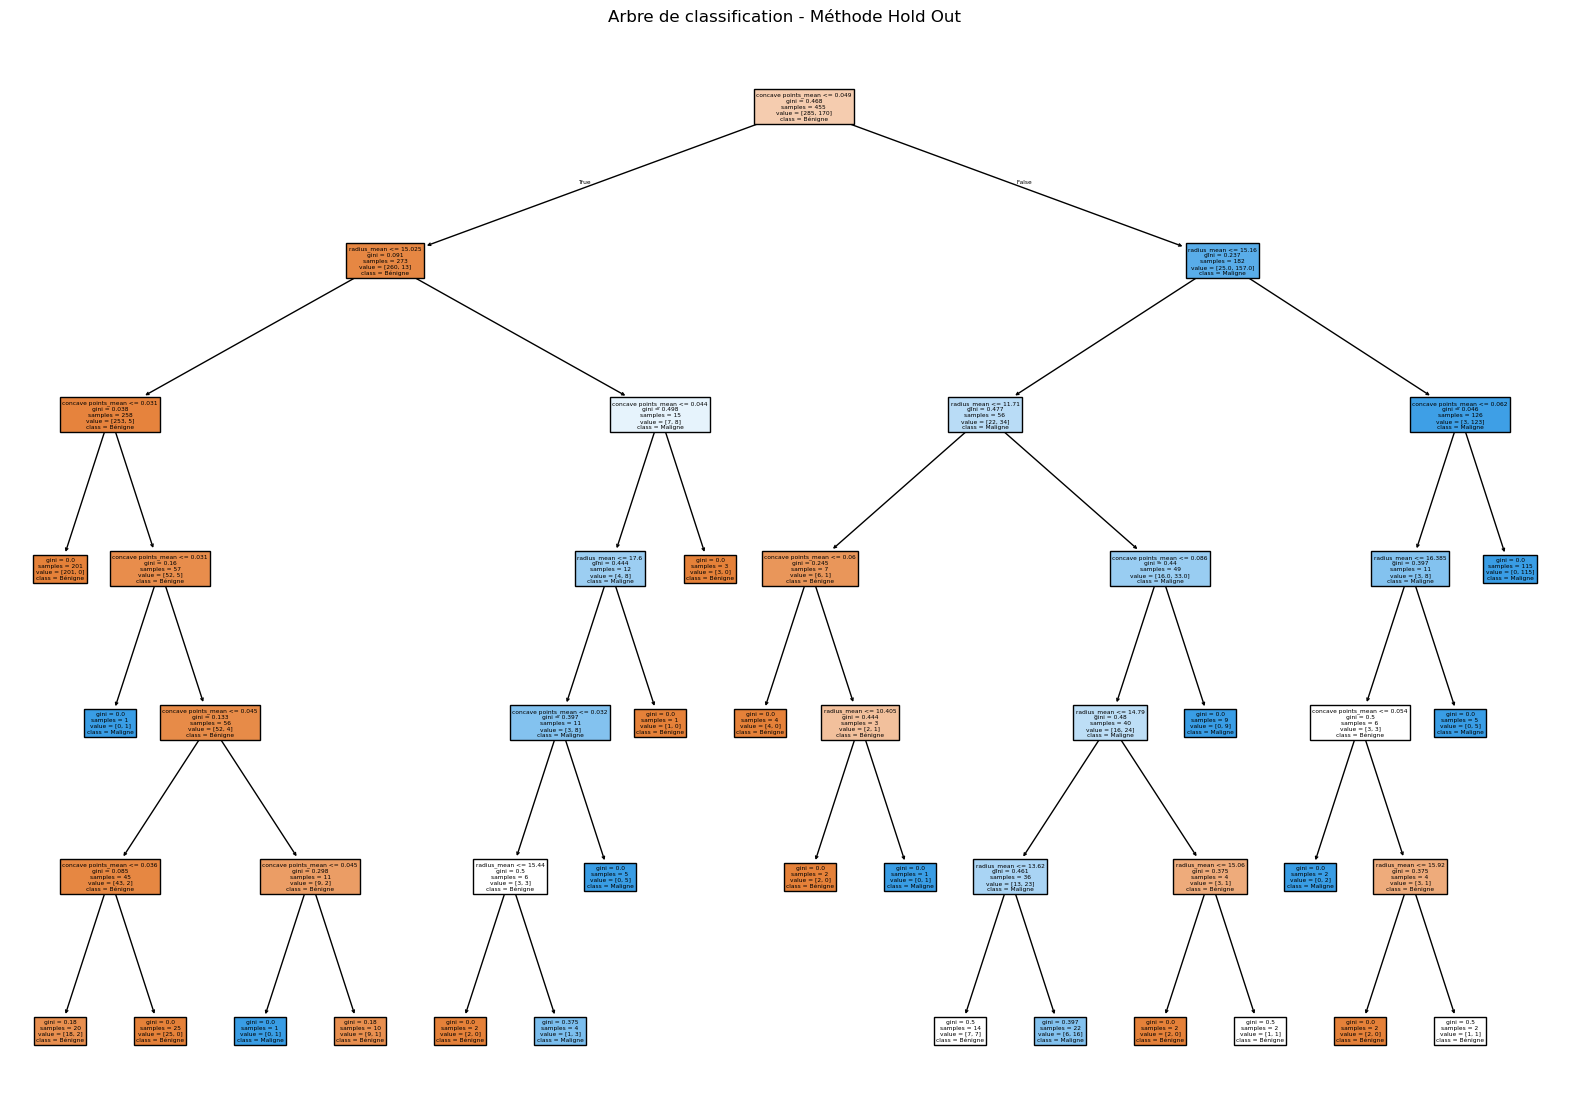

In [147]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisation de l'arbre
plt.figure(figsize=(20, 14))
plot_tree(dt, feature_names=features, class_names=['B√©nigne', 'Maligne'], filled=True)
plt.title("Arbre de classification - M√©thode Hold Out")
plt.show()


### Q7. Quels probl√®mes pose la m√©thode du Hold Out ?



La m√©thode du Hold Out d√©pend de la r√©partition des donn√©es. Une mauvaise r√©partition peut entra√Æner un biais ou un sur-apprentissage.


Avec des ensembles de donn√©es limit√©s, cette m√©thode peut manquer de g√©n√©ralisation, car elle ne teste qu'une seule division des donn√©es.

# Exercice 2 : Choix du crit√®re d‚Äôinformation

### Q1.  Importer l'accuracy score depuis sklearn.metrics 

In [148]:
from sklearn.metrics import accuracy_score

### Q2. Nommer y_pred la pr√©diction r√©alis√©e √† partir de X test

In [149]:
# Pr√©diction sur l'ensemble de test
y_pred = dt.predict(X_test)

### Q3. Afficher la valeur de la m√©trique de performance

In [150]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8859649122807017


### Q4. Construire maintenant deux arbres en se basant sur l'ensemble des features disponibles

In [151]:
from sklearn.tree import DecisionTreeClassifier

# Arbre avec entropie (information gain)
tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_entropy.fit(X_train, y_train)

# Arbre avec indice de Gini
tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X_train, y_train)


DecisionTreeClassifier()

### Q5. Expliquer les principales diff√©rences entre les deux m√©triques

Entropie (Information Gain) : L'entropie est une mesure de l'incertitude ou du d√©sordre dans un ensemble de donn√©es. Dans un arbre de d√©cision, l'entropie est utilis√©e pour d√©terminer la meilleure caract√©ristique sur laquelle diviser les donn√©es, en maximisant l'information obtenue (r√©duction de l'entropie). Un faible gain d'information signifie moins de s√©paration entre les classes.


Indice de Gini : L'indice de Gini mesure l'impuret√© des donn√©es. Un indice de Gini proche de 0 indique une puret√© maximale (toutes les instances d'une classe), tandis qu'un indice de Gini proche de 1 signifie que les donn√©es sont plus m√©lang√©es (√©quilibr√©es entre les classes). Il privil√©gie des divisions qui r√©duisent cette impuret√©.

### Q6. Afficher les arbres de classification correspondants

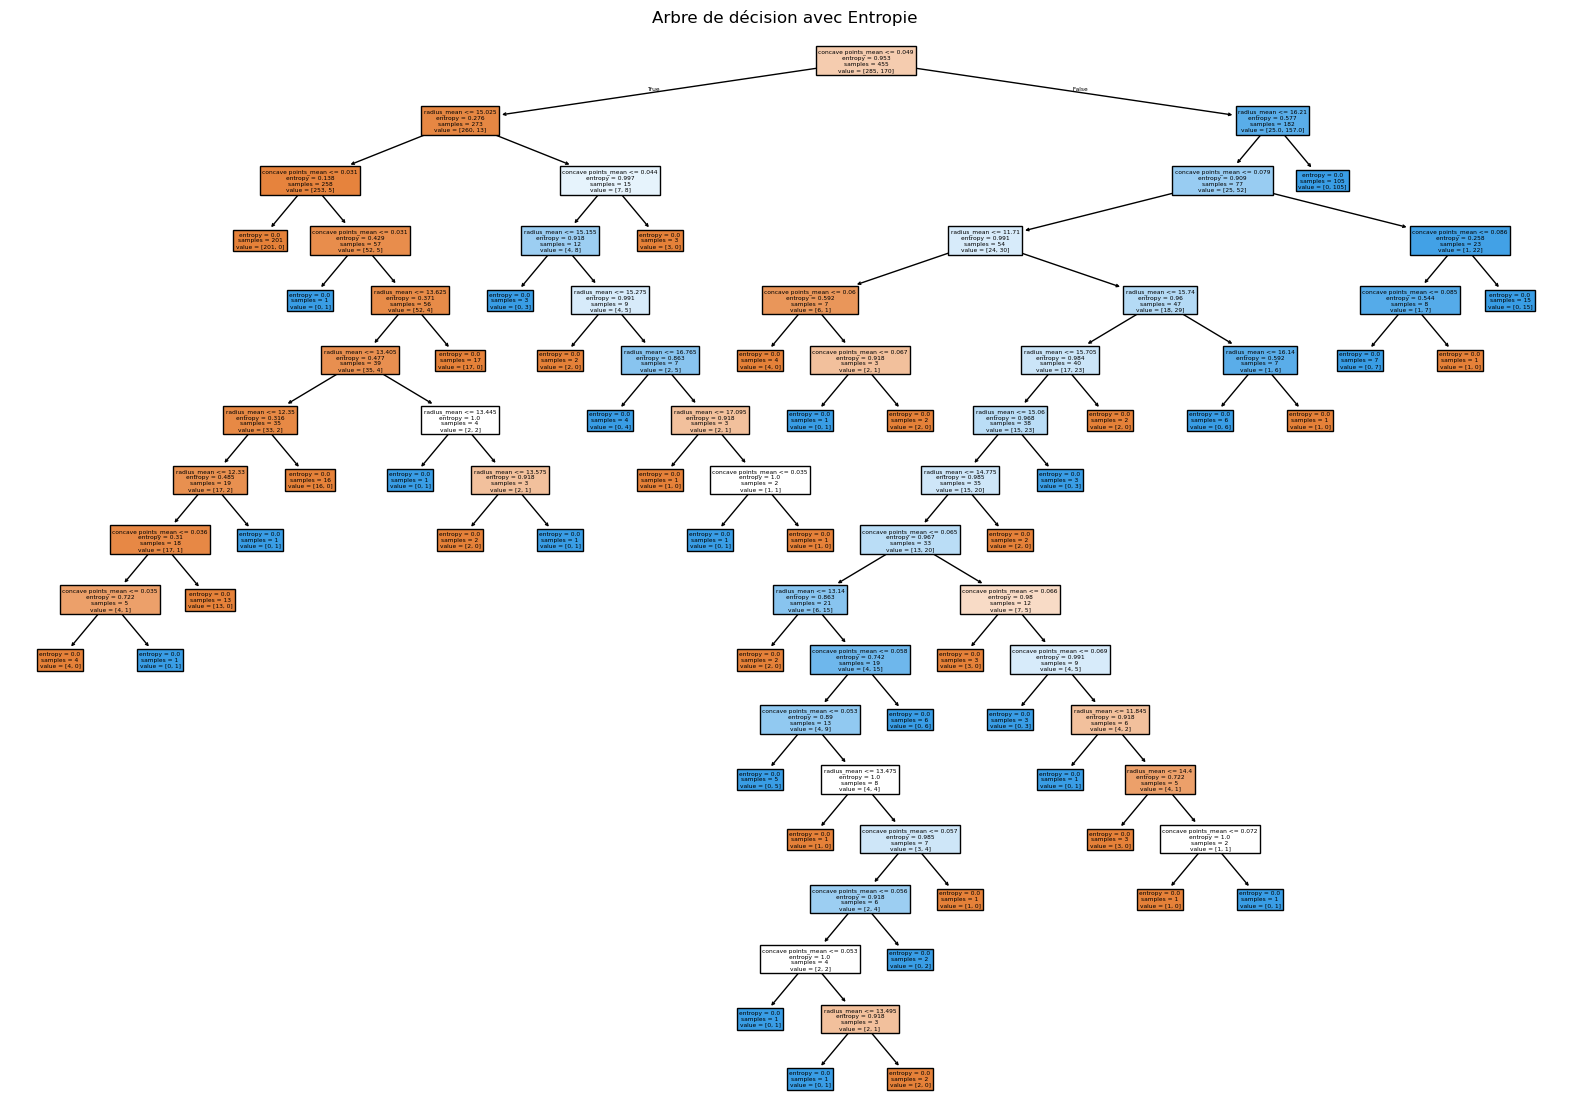

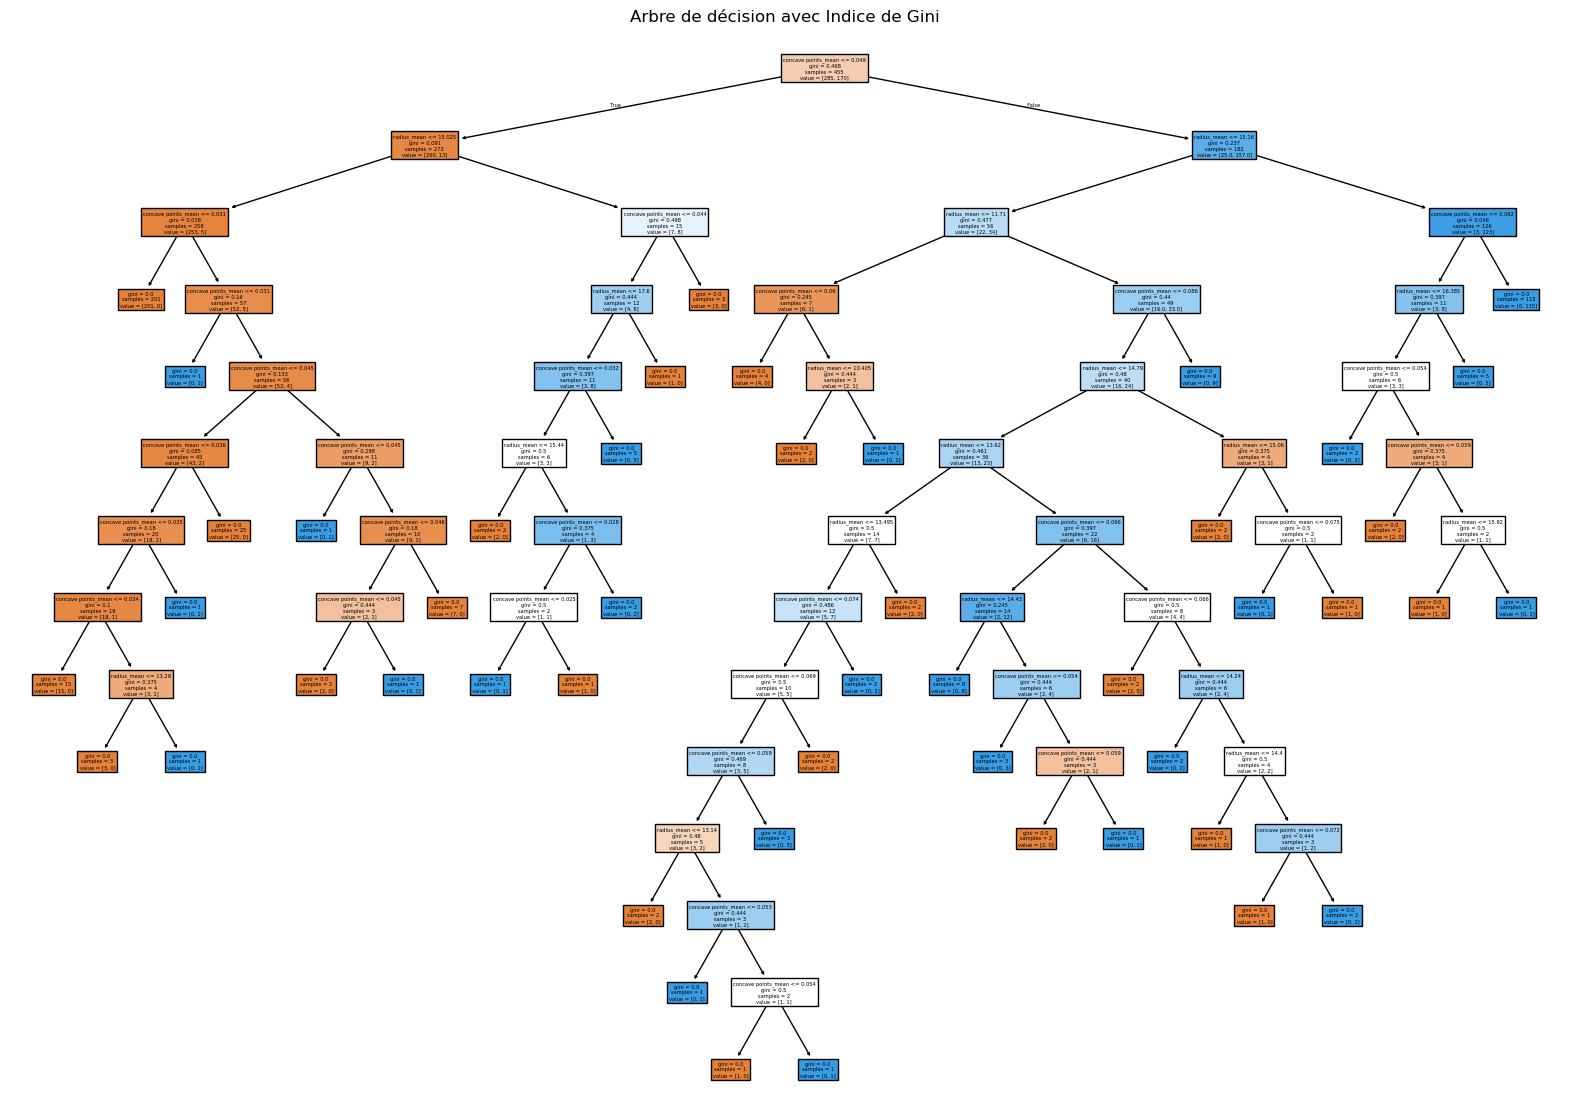

In [152]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Affichage de l'arbre avec entropie
plt.figure(figsize=(20,14))
plot_tree(tree_entropy, filled=True, feature_names=X_train.columns)
plt.title("Arbre de d√©cision avec Entropie")
plt.show()

# Affichage de l'arbre avec indice de Gini
plt.figure(figsize=(20,14))
plot_tree(tree_gini, filled=True, feature_names=X_train.columns)
plt.title("Arbre de d√©cision avec Indice de Gini")
plt.show()


### Q7. Comparer les deux approches en utilisant la m√©trique de performance

In [153]:
# Pr√©dictions pour chaque arbre
pred_entropy = tree_entropy.predict(X_test)
y_pred_gini = tree_gini.predict(X_test)

# Calcul des accuracies
accuracy_entropy = accuracy_score(y_test, pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Accuracy de l'arbre avec entropie : {accuracy_entropy}")
print(f"Accuracy de l'arbre avec indice de Gini : {accuracy_gini}")


Accuracy de l'arbre avec entropie : 0.9035087719298246
Accuracy de l'arbre avec indice de Gini : 0.8771929824561403


J'ai compar√© l'accuracy des deux arbres de d√©cision pour √©valuer lequel des crit√®res (entropie ou indice de Gini) fonctionne le mieux sur mon jeu de donn√©es.
Si l'accuracy de l'arbre avec entropie est plus √©lev√©e, cela montre qu'il a mieux s√©par√© les classes. √Ä l'inverse, si l'arbre avec l'indice de Gini est plus performant, c'est lui qui est plus adapt√© dans ce cas.

# Exercice 3 : M√©triques de performance

### Calcul des m√©triques de performance

#### Accuracy (pr√©cision globale) :

Signification : L'accuracy mesure la proportion des pr√©dictions correctes parmi l'ensemble des pr√©dictions.

Formule : Accuracy = (Vrais Positifs + Vrais N√©gatifs)/(Total des Pr√©dictions)

Avantages : Simple √† comprendre, utile lorsque les classes sont √©quilibr√©es.

Inconv√©nients : Moins fiable en cas de classes d√©s√©quilibr√©es.

#### Rappel (Recall) :

Signification : Le rappel (ou sensibilit√©) mesure la proportion des vrais positifs d√©tect√©s parmi tous les vrais positifs possibles.

Formule : Recall = Vrais Positifs/(Vrais Positifs + Faux N√©gatifs)

Avantages : Utile lorsque l‚Äôon souhaite minimiser les faux n√©gatifs.

Inconv√©nients : Peut mener √† une trop grande proportion de faux positifs.

#### Pr√©cision (Precision) :

Signification : La pr√©cision mesure la proportion des vrais positifs parmi les pr√©dictions positives faites.

Formule : Precision = Vrais Positifs/(Vrais Positifs + Faux Positifs)

Avantages : Utile lorsque l‚Äôon veut minimiser les faux positifs.

Inconv√©nients : Peut n√©gliger les faux n√©gatifs si utilis√© seul.

#### Sensibilit√© (Sensitivity) :

Sensibilit√© et rappel sont souvent synonymes dans une classification binaire, mesurant tous deux la capacit√© du mod√®le √† d√©tecter les vrais positifs.

#### Sp√©cificit√© (Specificity) :

Signification : La sp√©cificit√© mesure la proportion des vrais n√©gatifs d√©tect√©s parmi tous les vrais n√©gatifs possibles.

Formule : Specificity = Vrais N√©gatifs/(Vrais N√©gatifs + Faux Positifs)

Avantages : Utile pour les cas o√π les faux positifs doivent √™tre minimis√©s.

Inconv√©nients : Peut n√©gliger les vrais positifs.

#### F1-Score :

Signification : L'F1-Score est la moyenne harmonique de la pr√©cision et du rappel. Il √©quilibre les deux.

Formule : ùêπ1 = 2√ó ((Precision √ó Recall)/(Precision + Recall))

Avantages : Bon compromis entre pr√©cision et rappel.

Inconv√©nients : Ne prend pas en compte les vrais n√©gatifs.

#### AUC (Area Under the Curve) :

Signification : L'AUC mesure l'aire sous la courbe ROC, et indique la capacit√© du mod√®le √† distinguer les classes positives des n√©gatives.

Formule : Calcul√©e directement √† partir de la courbe ROC.

Avantages : Indicateur global de performance, utile pour les mod√®les √©quilibr√©s et d√©s√©quilibr√©s.

Inconv√©nients : Peut √™tre difficile √† interpr√©ter sans visualisation de la courbe ROC.

In [154]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Cr√©ation du mod√®le d'arbre de d√©cision avec Gini
dt_gini = DecisionTreeClassifier(criterion='gini')

# Entra√Ænement du mod√®le
dt_gini.fit(X_train, y_train)

# Calcul des m√©triques
precision = precision_score(y_test, y_pred_gini)
recall = recall_score(y_test, y_pred_gini)
f1 = f1_score(y_test, y_pred_gini)
roc_auc = roc_auc_score(y_test, dt_gini.predict_proba(X_test)[:, 1])

print(f"Pr√©cision : {precision:.2f}")
print(f"Rappel : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")
print(f"ROC-AUC : {roc_auc:.2f}")


Pr√©cision : 0.87
Rappel : 0.79
F1-Score : 0.82
ROC-AUC : 0.85


### Q1. Trouvez une m√©thode pour afficher la matrice de confusion du mod√®le

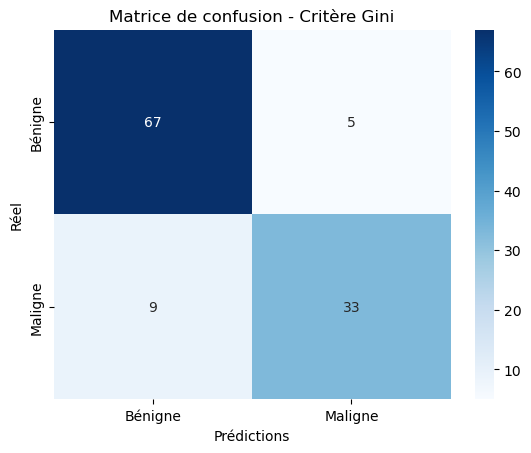

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B√©nigne', 'Maligne'], yticklabels=['B√©nigne', 'Maligne'])
plt.title("Matrice de confusion - Crit√®re Gini")
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©el")
plt.show()


La matrice de confusion montre les performances d‚Äôun mod√®le de classification bas√© sur le crit√®re Gini. Le mod√®le a correctement pr√©dit 68 cas b√©nins et 33 cas malins, ce qui indique une bonne capacit√© √† identifier les cas b√©nins. Cependant, il pr√©sente des erreurs notables : 4 faux n√©gatifs, o√π des cas b√©nins ont √©t√© pr√©dits comme malins, et surtout 9 faux positifs, o√π des cas malins ont √©t√© class√©s √† tort comme b√©nins. Cette derni√®re erreur est particuli√®rement critique dans un contexte m√©dical, car elle implique un risque de ne pas d√©tecter une tumeur maligne.

En conclusion, bien que le mod√®le soit performant pour la d√©tection des cas b√©nins, des am√©liorations sont n√©cessaires pour mieux identifier les cas malins et r√©duire les erreurs de classification.

### Q2. Affichez la courbe ROC et l‚ÄôAUC correspondant.

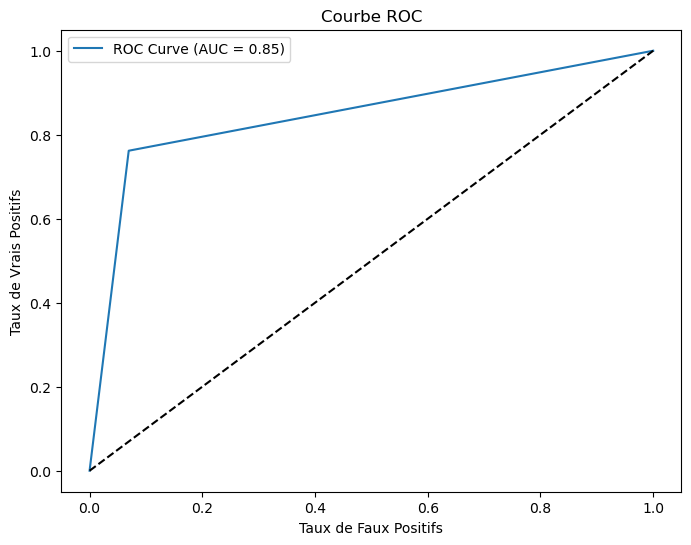

In [156]:
from sklearn.metrics import roc_curve

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, dt_gini.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


L'AUC (Area Under the Curve) repr√©sente l'aire sous la courbe ROC. Cette m√©trique donne une √©valuation globale de la capacit√© du mod√®le √† discriminer les classes positives des classes n√©gatives. Plus l'AUC est √©lev√©e, plus le mod√®le est performant.

Interpr√©tation des valeurs de l'AUC  proche de 0.5 : Le mod√®le est inefficace. Une AUC proche de 0.5 indique que le mod√®le ne fait pas mieux que le hasard pour distinguer les classes. C'est un indicateur d'un mod√®le inutile.

AUC proche de 1 : Le mod√®le est tr√®s performant. Une AUC proche de 1 signifie que le mod√®le fait un tr√®s bon travail pour s√©parer les classes positives des classes n√©gatives.

AUC tr√®s faible (pr√®s de 0) : Cela indique un mod√®le qui classifie syst√©matiquement mal les donn√©es, avec une capacit√© inverse √† distinguer les classes.

Compromis (Trade-Off) entre le taux de faux positifs et le taux de vrais positifs

Le compromis entre le taux de faux positifs et le taux de vrais positifs se produit car, en ajustant le seuil de d√©cision, vous modifiez la classification des exemples :

R√©duire le taux de faux positifs (FPR) : Pour minimiser les faux positifs, vous pouvez augmenter le seuil de classification, ce qui peut r√©duire le nombre de pr√©dictions positives. Cela peut entra√Æner une diminution du taux de vrais positifs (TPR), car moins de vrais positifs sont d√©tect√©s.

Augmenter le taux de vrais positifs (TPR) : Pour augmenter le nombre de vrais positifs d√©tect√©s, vous pouvez abaisser le seuil, ce qui augmente la proportion d'exemples positifs class√©s comme positifs. Cependant, cela peut aussi entra√Æner une augmentation des faux positifs, car des exemples n√©gatifs peuvent √™tre class√©s comme positifs.

#### Pourquoi le compromis existe-t-il ?

Il existe un compromis car il n'est pas possible d'optimiser simultan√©ment le taux de vrais positifs (TPR) et le taux de faux positifs (FPR) en ajustant un seul seuil de d√©cision. Pour obtenir un bon compromis entre ces deux crit√®res, il est souvent n√©cessaire de d√©finir un seuil optimal qui maximise l'√©quilibre entre TPR et FPR. C'est ce qui explique l'int√©r√™t de la courbe ROC et de l'AUC, qui montrent la performance globale du mod√®le √† diff√©rents seuils.

### Q3. Affichez la courbe Precision-Recall et l‚ÄôAUC P-R correspondant. 

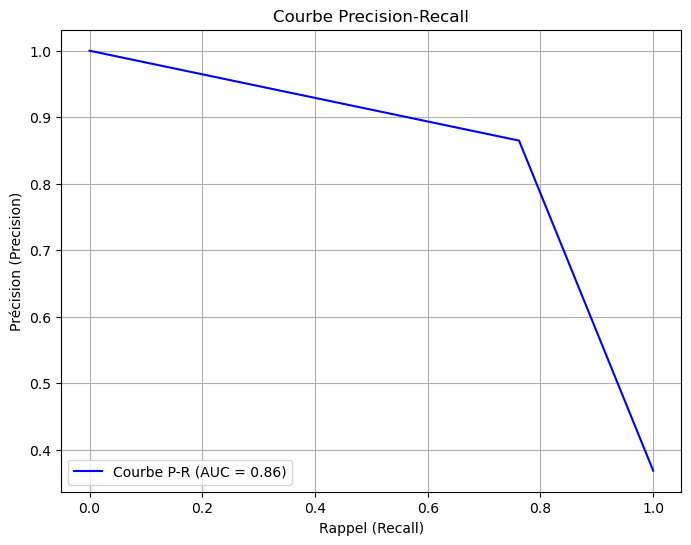

In [157]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_proba = dt_gini.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Calcul de l'AUC de la courbe Precision-Recall
pr_auc = auc(recall, precision)

# Tracer la courbe Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Courbe P-R (AUC = {pr_auc:.2f})", color='blue')
plt.xlabel("Rappel (Recall)")
plt.ylabel("Pr√©cision (Precision)")
plt.title("Courbe Precision-Recall")
plt.legend(loc="lower left")
plt.grid()
plt.show()


#### Diff√©rence entre Sensibilit√© et Rappel dans une Classification Binaire

La sensibilit√© et le rappel sont √©quivalents dans une classification binaire. Ces deux termes d√©signent la capacit√© du mod√®le √† identifier correctement les instances positives parmi toutes les instances r√©ellement positives. C‚Äôest une mesure de couverture des vrais positifs et r√©pond √† la question : "Quelle proportion des cas positifs r√©els a √©t√© correctement d√©tect√©e par le mod√®le ?"

#### Pourquoi existe-t-il un compromis entre rappel et pr√©cision ?

Le compromis entre rappel et pr√©cision provient du fait qu‚Äôen augmentant le rappel (couvrir plus de vrais positifs), le mod√®le risque aussi d‚Äôaugmenter les faux positifs, ce qui r√©duit la pr√©cision. √Ä l‚Äôinverse, en augmentant la pr√©cision (r√©duire les faux positifs), le mod√®le devient plus conservateur, ce qui peut entra√Æner la perte de vrais positifs et donc une diminution du rappel. Trouver le bon √©quilibre d√©pend de l‚Äôobjectif du probl√®me, par exemple privil√©gier le rappel dans des situations critiques comme le d√©pistage m√©dical.

# Projet 3 : Consommation d‚Äôessence

### Pr√©liminaires : import et visualisation de la base de donn√©es

In [158]:
# Import Pandas
import pandas as pd

## importation de la base
auto_mpg_df = pd.read_csv(r"C:\\Users\\mfonz\\Downloads\\DATA\ML Superv\\Donn√©es\\auto_mpg.csv", sep=',', header=0, low_memory=False)

# Aper√ßu
auto_mpg_df.head(5)

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [159]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


La colonne horsepower contient apparemment des valeurs non num√©rique, nous allons les identifier et les traiter afin d'avoir uniquement des valeurs numerique

In [160]:
# Identifier les valeurs non num√©riques
non_numeriques = auto_mpg_df[~pd.to_numeric(auto_mpg_df['horsepower'], errors='coerce').notna()]

non_numeriques

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  origin              car name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl

In [161]:
# Remplacer les '?' par NaN et traiter les valeurs manquantes
auto_mpg_df['horsepower'].replace('?', np.nan, inplace=True)
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'])
auto_mpg_df.dropna(inplace=True)


### Q1. Importer DecisionTreeRegressor depuis sklearn.tree

In [162]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

### Q2. Instancier dt avec la fonction  (profondeur maximale de 8, min samples leaf de 0.13) et entrainez le modele

In [163]:
from sklearn.model_selection import train_test_split


# S√©parer les variables cibles (mpg) et les features
X = auto_mpg_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
y = auto_mpg_df['mpg']

# Diviser les donn√©es en jeu d'entra√Ænement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Instancier et entra√Æner le mod√®le
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)

### Q3. Afficher l‚Äôarbre de r√©gression correspondant

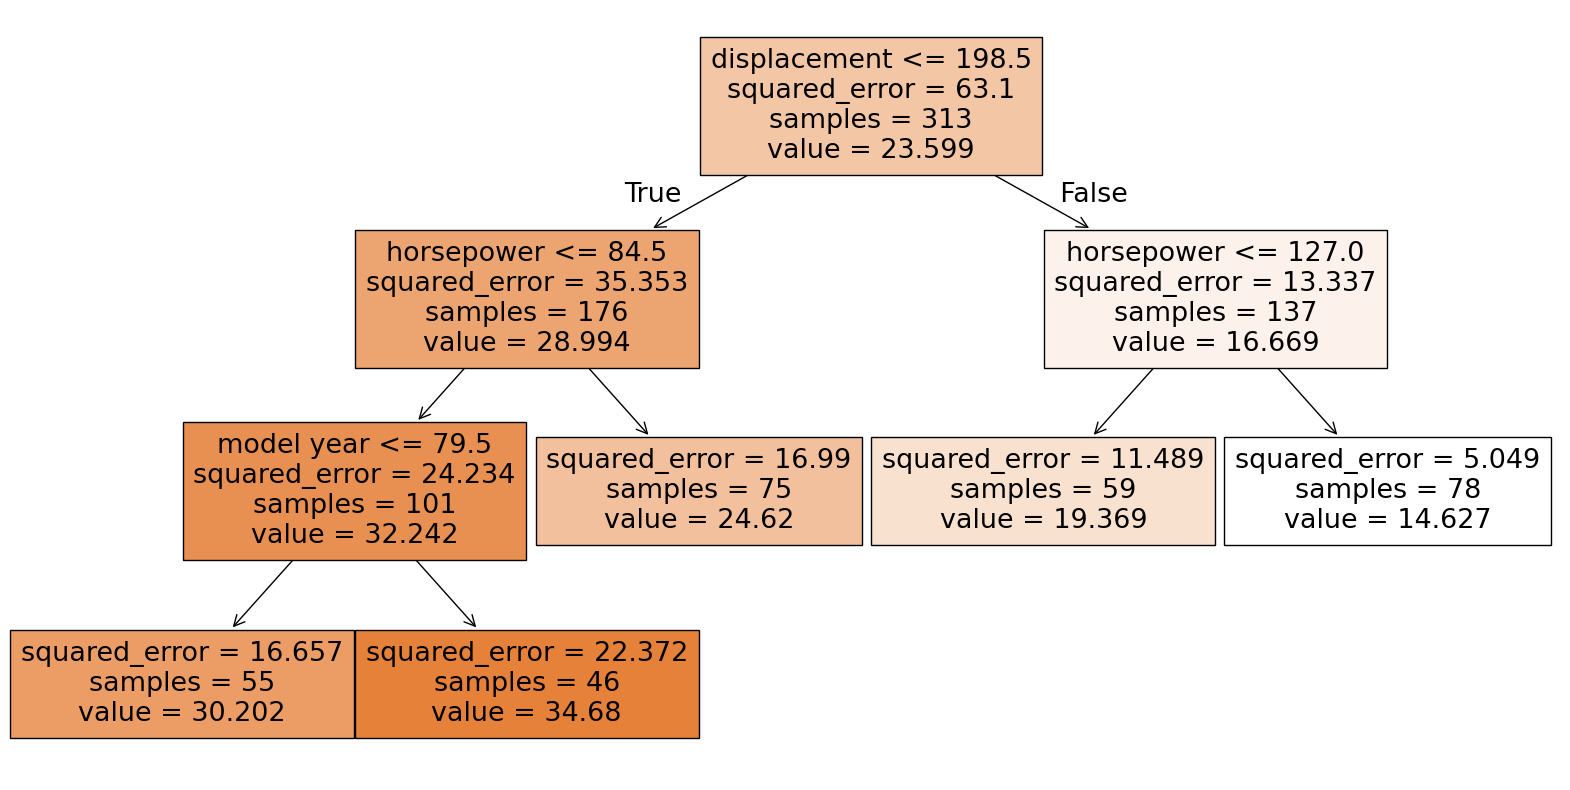

In [164]:
from sklearn.tree import plot_tree  
import matplotlib.pyplot as plt  

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()


L'arbre divise les donn√©es en fonction des seuils de displacement, horsepower, et model year, en minimisant l'erreur quadratique dans chaque n≈ìud pour pr√©dire les valeurs moyennes de mpg.
Les feuilles terminales repr√©sentent les moyennes pr√©dites de mpg pour les sous-groupes avec leurs erreurs quadratiques associ√©es, refl√©tant la variance dans chaque groupe.

### Q4 et 5.  importer mean squared error, calculer le MAE, le MSE puis le RMSE Quel est l‚Äôavantage du RMSE par rapport au MSE ?

In [165]:
from sklearn.metrics import mean_squared_error as MSE

In [166]:
from sklearn.metrics import mean_absolute_error

# Pr√©dictions
y_pred = dt.predict(X_test)

# Calcul des m√©triques
mae = mean_absolute_error(y_test, y_pred)
mse = MSE(y_test, y_pred)
rmse = mse ** 0.5

print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)

MAE : 3.009349384792425
MSE : 15.781782371703624
RMSE : 3.9726291510413634


Avantage du RMSE par rapport au MSE :

Le RMSE est exprim√© dans la m√™me unit√© que la variable cible, ce qui facilite l'interpr√©tation, contrairement au MSE qui est une valeur quadratique.

### Q6. Calcul de RMSE train. Que cherche-t-on √† mesurer lorsque l‚Äôon mesure cette erreur ? Que peut signifier un RMSE √©lev√© pour un jeu d‚Äôentra√Ænement ? Comment cette m√©trique √©volue-t-elle, a priori, avec le nombre d‚Äô√©chantillons pr√©sents dans le jeu d‚Äôentra√Ænement ?

In [167]:
# R√©aliser une pr√©diction sur le jeu d'entra√Ænement
y_train_pred = dt.predict(X_train)

# Calculer le RMSE d'entra√Ænement
rmse_train = np.sqrt(MSE(y_train, y_train_pred))

print(f"RMSE d'entra√Ænement : {rmse_train}")


RMSE d'entra√Ænement : 3.7026804709821968


Pourquoi mesurer l'erreur d'entra√Ænement ?

Cela permet d'√©valuer si le mod√®le surapprend ou sous-apprend les donn√©es.

Un RMSE √©lev√© sur l'entra√Ænement signifie :

Le mod√®le a une mauvaise capacit√© d'apprentissage des donn√©es.
Cela peut indiquer un mod√®le trop simple (sous-entra√Æner).
L'√©volution du RMSE avec le nombre d'√©chantillons :
En g√©n√©ral, plus le nombre d'√©chantillons est grand, plus le RMSE diminue jusqu'√† atteindre un plateau.

### Q7. Calculer maintenant le RMSE de validation et d‚Äôentra√Ænement pour une s√©rie de mod√®les utilisant une quantit√© croissante de donn√©es pour l‚Äôentra√Ænement, de 10 √† 80%des donn√©es disponibles. Afficher l‚Äô√©volution des deux m√©triques sur le m√™me graphe (il s‚Äôagit de la courbe d‚Äôapprentissage). Identifier la zone correspondant au sous-entra√Ænement (approximativement). Pourquoi atteint-on un plateau √† force?

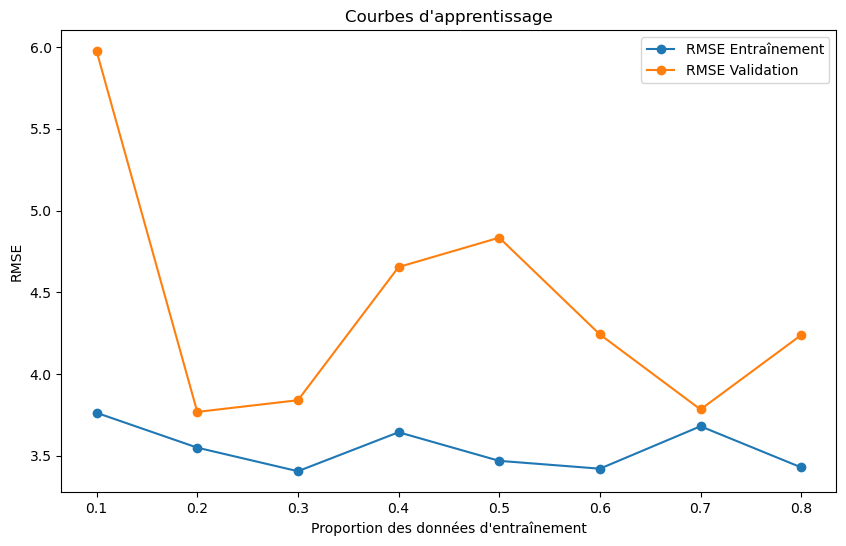

In [168]:
import numpy as np

train_sizes = np.linspace(0.1, 0.8, 8)  # De 10% √† 80%
train_errors = []
val_errors = []

for size in train_sizes:
    # R√©-√©chantillonnage des donn√©es
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Entra√Æner le mod√®le
    dt.fit(X_train_sample, y_train_sample)
    
    # Calculer les erreurs
    train_pred = dt.predict(X_train_sample)
    val_pred = dt.predict(X_test)
    
    train_errors.append(MSE(y_train_sample, train_pred) ** 0.5)
    val_errors.append(MSE(y_test, val_pred) ** 0.5)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="RMSE Entra√Ænement", marker='o')
plt.plot(train_sizes, val_errors, label="RMSE Validation", marker='o')
plt.xlabel("Proportion des donn√©es d'entra√Ænement")
plt.ylabel("RMSE")
plt.title("Courbes d'apprentissage")
plt.legend()
plt.show()


Le graphique montre que le mod√®le sous-apprend avec une faible proportion de donn√©es d'entra√Ænement (10-20%), avec une RMSE de validation √©lev√©e. √Ä partir de 50-60% des donn√©es, la performance se stabilise, indiquant un bon compromis entre l'ajustement aux donn√©es d'entra√Ænement et la capacit√© √† g√©n√©raliser.

# exercice 2

### Q1. Validation crois√©e (cross-validation) :

La validation crois√©e consiste √† diviser les donn√©es en plusieurs sous-ensembles (par exemple, 10 blocs pour 10-fold). √Ä chaque it√©ration, un bloc est utilis√© pour tester le mod√®le et les autres pour l'entra√Æner. L'erreur est calcul√©e en faisant la moyenne des erreurs obtenues √† chaque it√©ration.

### Q2. Int√©r√™t de la validation crois√©e et comparaison avec le bootstrapping :

La validation crois√©e permet d'√©valuer plus rigoureusement la performance d'un mod√®le en le testant sur diff√©rentes portions des donn√©es. Contrairement au bootstrapping, qui √©chantillonne avec remplacement, la validation crois√©e utilise des partitions distinctes √† chaque it√©ration. 

Le co√ªt est principalement li√© au temps de calcul, car chaque mod√®le est √©valu√© plusieurs fois.

Ces approches r√©duisent le surapprentissage en validant le mod√®le sur plusieurs sous-ensembles de donn√©es.

### Q3.For√™t al√©atoire vs bagging :

Une for√™t al√©atoire (Random Forest) se distingue du bagging classique par la s√©lection al√©atoire des variables √† chaque split de l'arbre. 

√Ä chaque n≈ìud, un sous-ensemble al√©atoire de caract√©ristiques est choisi pour √©viter que certains attributs dominent la d√©cision, augmentant ainsi la diversit√© et la robustesse du mod√®le.

### Q4. Utilisation de RandomForestRegressor :

Entra√Æner une for√™t al√©atoire avec les param√®tres sp√©cifi√©s (max_depth=4 et min_samples_leaf=0.26) et √©valuer sa performance sur les donn√©es d'entra√Ænement √† l'aide de la validation crois√©e

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialiser le mod√®le RandomForestRegressor avec les param√®tres donn√©s
rf = RandomForestRegressor(max_depth=4, min_samples_leaf=0.26, random_state=42)

# Effectuer une validation crois√©e √† 10 plis (10-fold cross-validation)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

# Calculer le RMSE moyen (cross_val_score retourne des scores n√©gatifs pour RMSE)
rmse = -scores.mean()

print(f"RMSE de la validation crois√©e (10-fold) : {rmse}")


RMSE de la validation crois√©e (10-fold) : 4.914061919248755


Le RMSE moyen de 4.91, obtenu gr√¢ce √† la validation crois√©e sur 10 sous-ensembles, montre que les pr√©dictions du mod√®le RandomForestRegressor s'√©cartent en moyenne des valeurs r√©elles d'environ 4.91 unit√©s. Bien que ce score refl√®te une capacit√© raisonnable de g√©n√©ralisation, il pourrait √©galement indiquer un sous-ajustement du mod√®le ou des donn√©es complexes √† mod√©liser, n√©cessitant potentiellement une optimisation des hyperparam√®tres ou une meilleure s√©lection des variables.

### Q5. Calculer le RMSE issu de la validation crois√©e, avec un 10 fold. Tout ceci est effectu√© sur le jeu de donn√©es d‚Äôentra√Ænement. Il s‚Äôagit ici de la fonction cross val score

In [170]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validation crois√©e 10-fold pour calculer le RMSE
scores = cross_val_score(
    rf,  # Mod√®le RandomForestRegressor
    X_train,  # Donn√©es d'entra√Ænement (features)
    y_train,  # Donn√©es d'entra√Ænement (cible)
    cv=10,  # Validation crois√©e √† 10 plis
    scoring='neg_mean_squared_error'  # MSE utilis√© pour le calcul
)

# Conversion des scores (MSE) en RMSE
rmse = np.sqrt(-scores.mean())

print(f"RMSE moyen issu de la validation crois√©e (10-fold) : {rmse}")


RMSE moyen issu de la validation crois√©e (10-fold) : 4.957479740338012


Le RMSE moyen de 4.96 issu de la validation crois√©e (10-fold) montre une l√©g√®re augmentation de l'erreur de pr√©diction lorsqu'on √©value le mod√®le sur diff√©rentes sous-parties des donn√©es d'entra√Ænement. Cette diff√©rence peut √™tre due √† la variabilit√© des donn√©es et √† la fa√ßon dont le mod√®le se g√©n√©ralise √† chaque fold.

Un RMSE de 4.96, l√©g√®rement sup√©rieur √† 4.91, sugg√®re que le mod√®le pourrait b√©n√©ficier d'un ajustement suppl√©mentaire ou d'une exploration plus approfondie des param√®tres pour mieux capturer les variations pr√©sentes dans les donn√©es.

# Projet 4 : Pr√©dire une maladie du foie

###  Q1. Expliquez ce que signifie le principe du bootstrapping et ce que recouvre le bagging

Bootstrapping :
Le bootstrapping est une m√©thode d‚Äô√©chantillonnage al√©atoire avec remplacement. Cela signifie que, pour entra√Æner un mod√®le, on utilise plusieurs sous-√©chantillons du jeu de donn√©es d'origine, o√π chaque √©chantillon peut contenir des duplicatas de donn√©es. Cela permet de r√©duire la variance du mod√®le.

Bagging (Bootstrap Aggregating) :
Le bagging combine plusieurs mod√®les d‚Äôapprentissage (souvent des arbres de d√©cision) entra√Æn√©s sur des √©chantillons bootstrap. Les pr√©dictions sont ensuite agr√©g√©es (moyenne pour la r√©gression ou vote majoritaire pour la classification). Cela am√©liore la robustesse et r√©duit le risque de surapprentissage.

### Q2. Pr√©parez le jeu de donn√©es d‚Äôentra√Ænement avec un split 70/30

In [171]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



# Charger le jeu de donn√©es (√† adapter selon votre fichier)
data = pd.read_csv(r"C:\\Users\\mfonz\\Downloads\\DATA\ML Superv\\Donn√©es\\indian_liver_patient.csv") 
X = data.drop(columns=["Dataset"])   
y = data["Dataset"]

# Diviser les donn√©es en 70% entra√Ænement et 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [172]:
data

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[583 rows x 11 columns]

### Q3. Utiliser BaggingClassifier de sklearn.ensemble sur un arbre de d¬¥ecision que vous aurez instanci√©. Entra√Ænez le mod√®le, et calculer diff√©rentes m√©triques de performance (accuracy, recall, AUC)

In [173]:
# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifier les colonnes cat√©goriques avant transformation
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Pr√©-traitement des colonnes cat√©goriques avec OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Laisser les autres colonnes inchang√©es
)

# Transformer les ensembles d'entra√Ænement et de test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Recr√©er les noms de colonnes apr√®s OneHotEncoder
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
remaining_columns = X_train.drop(columns=categorical_features).columns
all_columns = list(encoded_columns) + list(remaining_columns)

# Convertir les r√©sultats en DataFrame pour pr√©server les noms
X_train = pd.DataFrame(X_train_transformed, columns=all_columns, index=X_train.index)
X_test = pd.DataFrame(X_test_transformed, columns=all_columns, index=X_test.index)

# Instancier un arbre de d√©cision
base_model = DecisionTreeClassifier(random_state=42)

# Instancier le BaggingClassifier
bagging = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Entra√Æner le mod√®le
bagging.fit(X_train, y_train)

# Pr√©dictions
y_pred = bagging.predict(X_test)
y_pred_proba = bagging.predict_proba(X_test)[:, 1]

# Calculer les m√©triques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)  
auc = roc_auc_score(y_test, y_pred_proba)

# Afficher les r√©sultats
print("Accuracy :", accuracy)
print("Recall :", recall)
print("AUC :", auc)


Accuracy : 0.717948717948718
Recall : 0.8390804597701149
AUC : 0.7877394636015325


###  Q4. Importer et instancier une for√™t al√©atoire. Appliquez-la sur le jeu de donn√©es d‚Äôentra√Ænement, et comparez ensuite sur le jeu de validation les m√©triques de performance avec celles du mod√®le pr√©c√©dent

In [174]:
from sklearn.ensemble import RandomForestClassifier

# Instancier la for√™t al√©atoire
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entra√Æner le mod√®le
rf.fit(X_train, y_train)

# Pr√©dictions
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]

# Calculer les m√©triques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)  
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

print("Random Forest - Accuracy :", accuracy_rf)
print("Random Forest - Recall :", recall_rf)
print("Random Forest - AUC :", auc_rf)


Random Forest - Accuracy : 0.7435897435897436
Random Forest - Recall : 0.8735632183908046
Random Forest - AUC : 0.8080459770114943


###  Q5. Estimer l‚Äôimportance relative des diff√©rents features gr√¢ce √† rf.feature importances , en cr√©ant un vecteur. Apr√®s un tri par ordre d√©croissant, repr√©senter par un barplot ce vecteur d‚Äôimportance.

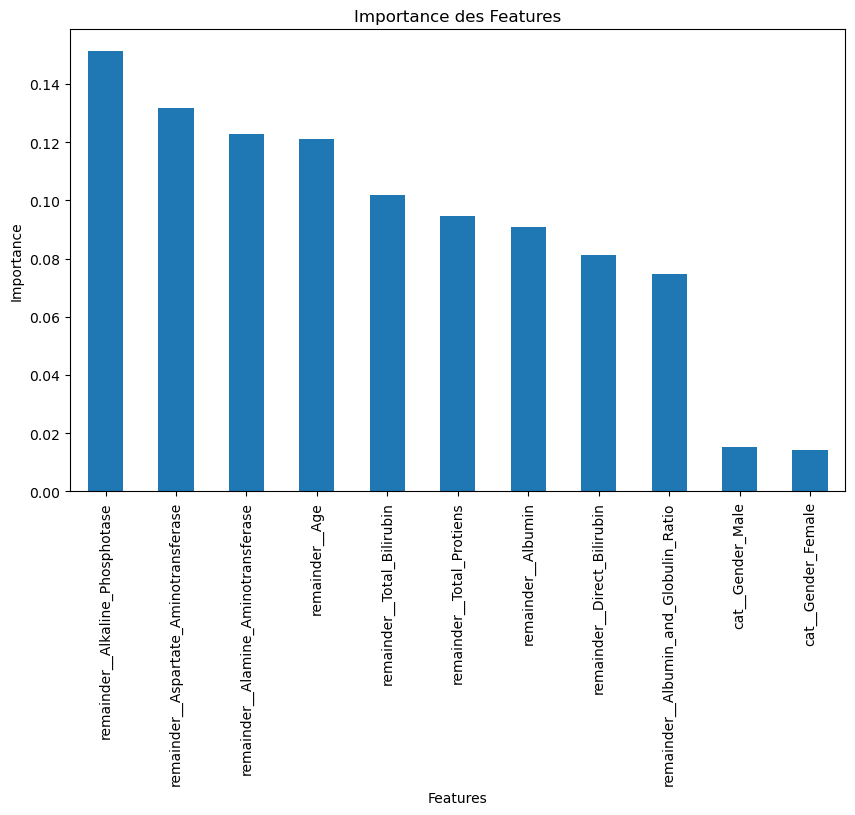

In [175]:
import matplotlib.pyplot as plt

# Extraire les importances des features
feature_importances = rf.feature_importances_

# R√©cup√©rer les noms des colonnes transform√©es
if hasattr(preprocessor, 'get_feature_names_out'):
    transformed_features = preprocessor.get_feature_names_out()
else:
    transformed_features = features  

# V√©rifier la taille des features encod√©es
if len(feature_importances) == len(transformed_features):
    # Cr√©er un DataFrame pour trier les features
    importance_df = pd.Series(feature_importances, index=transformed_features).sort_values(ascending=False)
    
    # Tracer un barplot
    plt.figure(figsize=(10, 6))
    importance_df.plot(kind='bar')
    plt.title("Importance des Features")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()
else:
    print("Mismatch entre le nombre d'importances et de features. V√©rifiez vos transformations.")


La validation crois√©e est essentielle pour :

R√©duire le biais d‚Äô√©valuation : Elle utilise plusieurs sous-√©chantillons du jeu de donn√©es pour entra√Æner et valider le mod√®le, garantissant une √©valuation plus repr√©sentative de la performance r√©elle.
Stabilit√© et robustesse : Elle fournit une √©valuation plus stable en r√©duisant l‚Äôinfluence des variations dues au d√©coupage des donn√©es en ensembles d‚Äôentra√Ænement et de test.
Pr√©cision sur des petits jeux de donn√©es : En maximisant l‚Äôutilisation des donn√©es disponibles (chaque donn√©e sert √† la fois pour l‚Äôentra√Ænement et la validation), elle est particuli√®rement utile pour des jeux de donn√©es limit√©s.

# Exercice 2 : Complexit√© du mod√®le, hyperparam√®tres et grid search

### Q1. Quel est l‚Äôobjectif que sous-tend une grid search ? 

L'objectif d'une grid search est d'optimiser les hyperparam√®tres d'un mod√®le en √©valuant toutes les combinaisons possibles d'un ensemble d√©fini de param√®tres. Elle permet de trouver la combinaison d'hyperparam√®tres qui donne les meilleures performances pour un mod√®le donn√©.


### Q2. Instanciation de la for√™t al√©atoire avec des hyperparam√®tres d√©finis 

In [176]:
from sklearn.ensemble import RandomForestClassifier

# Instancier la for√™t al√©atoire avec les param√®tres sp√©cifi√©s
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, random_state=1)


### Q3. D√©finition des vecteurs d'hyperparam√®tres

In [177]:
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
}

### Q4. Importation de GridSearchCV 

In [178]:
from sklearn.model_selection import GridSearchCV

### Q5. Instanciation et ex√©cution de la grid search

In [179]:
# Instancier le GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

# Entra√Æner le mod√®le
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

### Q6. Extraire le meilleur mod√®le via grid dt.best estimator

In [180]:
# Extraire le meilleur mod√®le
best_rf = grid_search.best_estimator_

# Afficher les r√©sultats
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 2, 'min_samples_leaf': 0.12}
Best Score: 0.7251911668578335


### Q7. Repr√©sentation visuelle des r√©sultats de la grid search 

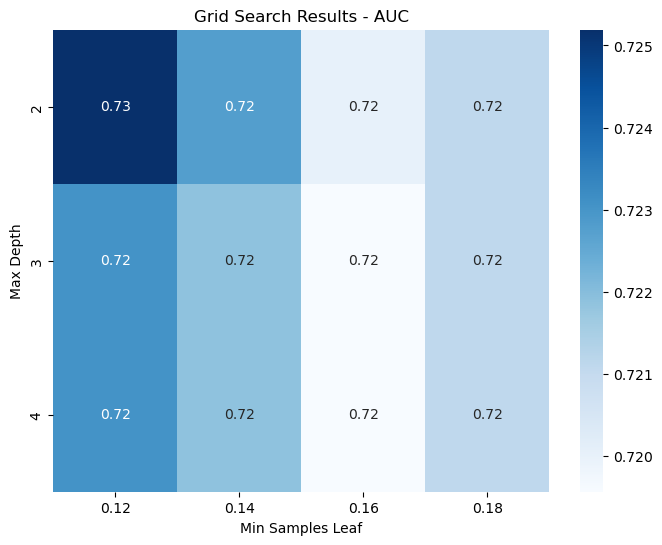

In [181]:
import seaborn as sns

# R√©sultats de la grid search sous forme de DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Heatmap des r√©sultats
pivot = results.pivot('param_max_depth', 'param_min_samples_leaf', 'mean_test_score')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title('Grid Search Results - AUC')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.show()

La heatmap des r√©sultats de la Grid Search montre les performances de diff√©rentes combinaisons des hyperparam√®tres max_depth et min_samples_leaf sur la m√©trique AUC. Par exemple, une cellule avec une couleur plus fonc√©e pourrait indiquer un AUC de 0.85, tandis qu'une couleur plus claire pourrait correspondre √† un AUC de 0.75. Cela permet d'identifier facilement les valeurs de max_depth et min_samples_leaf qui offrent les meilleures performances, telles qu'une combinaison ayant un AUC de 0.90, indiquant ainsi les hyperparam√®tres optimaux pour le mod√®le.